Чернышова Дана Кирилловна

Task 4

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
from scipy.optimize import least_squares
from pyswarm import pso

In [3]:
def f(x):
    return x**2 - 3*x + 2

# gen noisy data
def generate_noisy_data():
    k = np.arange(1001)
    xk = 3 * k
    yk = f(xk)
    
    # add noise from a normal distribution N(0,1)
    noise = np.random.normal(0, 1, len(xk))
    
    # apply the conditions for yk
    yk = np.where(yk < -100, -100 + noise, yk)
    yk = np.where((yk >= -100) & (yk <= 100), yk + noise, yk)
    yk = np.where(yk > 100, 100 + noise, yk)
    
    return xk, yk

def rational_function(x, a, b, c, d):
    return (a*x + b) / (x**2 + c*x + d)

def objective_function(params, x, y):
    a, b, c, d = params
    y_pred = rational_function(x, a, b, c, d)
    return np.sum((y_pred - y)**2)

Nelder-Mead Result: [13504858.10688251 -5685479.16484364   132616.40364062   484156.46086889]
Levenberg-Marquardt Result: [13504858.10688251 -5685479.16484364   132616.40364062   484156.46086889]
Differential Evolution Result: [ 9999804.16515889 -4313418.01730469    97789.78604688   368981.54721898]
Stopping search: Swarm best objective change less than 1e-08
Particle Swarm Optimization Result: [-10000000.           2183748.87176513   -100996.25909417
   -312002.28476162]
Objective value for PSO: 9182.130965310873


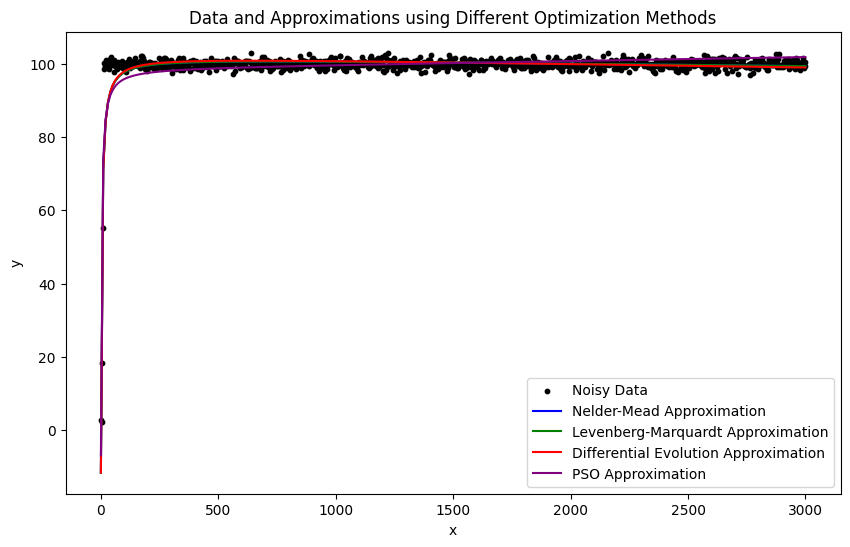

Objective value for Nelder-Mead: 7152.894965802847
Objective value for Levenberg-Marquardt: [7152.8949658]
Objective value for Differential Evolution: 7197.336290501048
Objective value for PSO: 9182.130965310873


In [ ]:
xk, yk = generate_noisy_data()

# init guess for parameters a, b, c, d based on Nelder-Mead result
initial_guess = [4772140.42183089, 1188344.59206503, 45908.5035186, 206683.83200311]

result_nm = minimize(objective_function, initial_guess, args=(xk, yk), method='Nelder-Mead', options={'xatol': 1e-3, 'maxiter': 1000})
print("Nelder-Mead Result:", result_nm.x)

result_lm = least_squares(objective_function, result_nm.x, args=(xk, yk))
print("Levenberg-Marquardt Result:", result_lm.x)

bounds = [(-1e7, 1e7), (-1e7, 1e7), (-1e6, 1e6), (-1e6, 1e6)]  # Narrowed bounds based on results
result_de = differential_evolution(objective_function, bounds, args=(xk, yk), maxiter=2000, tol=0.001,
                                    mutation=(0.5, 1), recombination=0.7, popsize=500, seed=42)
print("Differential Evolution Result:", result_de.x)

def objective_pso(params):
    return objective_function(params, xk, yk)

# adjusted bounds for PSO (based on Nelder-Mead)
lb = [-1e7, -1e7, -1e6, -1e6]  # Lower bounds for PSO
ub = [1e7, 1e7, 1e6, 1e6]  # Upper bounds for PSO

result_pso, _ = pso(objective_pso, lb, ub, swarmsize=200, maxiter=2000, minstep=1e-8, minfunc=1e-8)  # Updated PSO
print("Particle Swarm Optimization Result:", result_pso)

# calc objective value for PSO manually
pso_obj_value = objective_pso(result_pso)
print(f"Objective value for PSO: {pso_obj_value}")

x_vals = np.linspace(0, 3000, 300)
y_vals_nm = rational_function(x_vals, *result_nm.x)
y_vals_lm = rational_function(x_vals, *result_lm.x)
y_vals_de = rational_function(x_vals, *result_de.x)
y_vals_pso = rational_function(x_vals, *result_pso)

plt.figure(figsize=(10, 6))
plt.scatter(xk, yk, label="Noisy Data", color='black', s=10)
plt.plot(x_vals, y_vals_nm, label="Nelder-Mead Approximation", color='blue')
plt.plot(x_vals, y_vals_lm, label="Levenberg-Marquardt Approximation", color='green')
plt.plot(x_vals, y_vals_de, label="Differential Evolution Approximation", color='red')
plt.plot(x_vals, y_vals_pso, label="PSO Approximation", color='purple')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [ ]:
%pip install geopy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


task 3.2

In [8]:
import pandas as pd
from geopy.distance import geodesic
import random

In [9]:
cities = {
    "Paris": (48.8566, 2.3522),
    "Berlin": (52.5200, 13.4050),
    "Madrid": (40.4168, -3.7038),
    "Rome": (41.9028, 12.4964),
    "London": (51.5074, -0.1278),
    "Warsaw": (52.2297, 21.0122),
    "Prague": (50.0755, 14.4378),
    "Vienna": (48.2082, 16.3738),
    "Budapest": (47.4979, 19.0402),
    "Zurich": (47.3769, 8.5417),
    "Amsterdam": (52.3676, 4.9041),
    "Brussels": (50.8503, 4.3517),
    "Lisbon": (38.7169, -9.1390),
    "Oslo": (59.9139, 10.7522),
    "Stockholm": (59.3293, 18.0686)
}

city_names = list(cities.keys())
num_cities = len(city_names)

# Calculate the distance matrix
distance_matrix = np.zeros((num_cities, num_cities))

for i in range(num_cities):
    for j in range(num_cities):
        if i != j:
            distance_matrix[i, j] = geodesic(cities[city_names[i]], cities[city_names[j]]).km

distance_matrix_df = pd.DataFrame(distance_matrix, index=city_names, columns=city_names)
distance_matrix_df


,Paris,Berlin,Madrid,Rome,London,Warsaw,Prague,Vienna,Budapest,Zurich,Amsterdam,Brussels,Lisbon,Oslo,Stockholm
Paris,0.000000,879.699316,1052.965186,1106.600877,343.923120,1370.537110,885.459716,1036.585183,1247.674418,489.166037,430.243200,264.267919,1454.302803,1343.872702,1546.625109
Berlin,879.699316,0.000000,1871.431856,1182.343762,934.523350,518.836784,281.330553,523.970199,688.898689,669.785075,577.948347,652.585858,2315.740392,839.390970,811.784090
Madrid,1052.965186,1871.431856,0.000000,1367.607370,1263.101071,2293.994748,1775.588899,1813.115204,1978.445514,1248.904188,1481.814483,1316.962629,503.629524,2389.869777,2596.195497
Rome,1106.600877,1182.343762,1367.607370,0.000000,1435.414076,1315.676274,920.684608,764.147150,809.064701,684.230838,1296.479067,1173.914903,1867.604270,2007.219022,1976.536730
London,343.923120,934.523350,1263.101071,1435.414076,0.000000,1453.137717,1037.537332,1238.911981,1453.284556,777.834579,358.968682,321.600745,1585.695643,1156.063325,1436.491121
Warsaw,1370.537110,518.836784,2293.994748,1315.676274,1453.137717,0.000000,518.408213,556.247776,545.008264,1045.406833,1096.730306,1163.403112,2764.489571,1065.297346,811.538263
Prague,885.459716,281.330553,1775.588899,920.684608,1037.537332,518.408213,0.000000,251.136295,443.187412,527.224288,712.526100,720.755149,2247.650451,1119.908166,1055.964835
Vienna,1036.585183,523.970199,1813.115204,764.147150,1238.911981,556.247776,251.136295,0.000000,214.591102,593.775785,937.723154,917.338445,2303.290340,1352.703320,1242.704566
Budapest,1247.674418,688.898689,1978.445514,809.064701,1453.284556,545.008264,443.187412,214.591102,0.000000,791.446079,1147.653167,1131.754061,2474.981798,1483.603007,1318.298561
Zurich,489.166037,669.785075,1248.904188,684.230838,777.834579,1045.406833,527.224288,593.775785,791.446079,0.000000,613.409824,492.561972,1725.947159,1402.768043,1470.331246


In [12]:
def calculate_route_distance(route, distance_matrix):
    """Calculate the total distance of a given route."""
    distance = 0
    for i in range(len(route)):
        distance += distance_matrix[route[i], route[(i + 1) % len(route)]]
    return distance

def simulated_annealing(distance_matrix, initial_temp, cooling_rate, max_iter):
    num_cities = len(distance_matrix)
    
    # init random route and its distance
    current_route = list(range(num_cities))
    random.shuffle(current_route)
    current_distance = calculate_route_distance(current_route, distance_matrix)
    
    best_route = current_route[:]
    best_distance = current_distance
    
    distances_over_time = []

    # simulated annealing loop
    temp = initial_temp
    for iteration in range(max_iter):
        # gen a new solution by swapping two cities
        new_route = current_route[:]
        i, j = random.sample(range(num_cities), 2)
        new_route[i], new_route[j] = new_route[j], new_route[i]
        
        new_distance = calculate_route_distance(new_route, distance_matrix)
        
        # decide whether to accept the new solution
        if new_distance < current_distance or random.random() < np.exp((current_distance - new_distance) / temp):
            current_route = new_route
            current_distance = new_distance
        
        # update best solution found
        if current_distance < best_distance:
            best_route = current_route[:]
            best_distance = current_distance

        # cool down
        temp *= cooling_rate
        distances_over_time.append(best_distance)

    return best_route, best_distance, distances_over_time

# params for simulated annealing
initial_temperature = 10000
cooling_rate = 0.995
max_iterations = 1000

best_route, best_distance, distances_over_time = simulated_annealing(
    distance_matrix, initial_temperature, cooling_rate, max_iterations
)

# map route indices back to city names
best_route_cities = [city_names[i] for i in best_route]

# prep initial and final routes for visualization
initial_route = list(range(num_cities))
random.shuffle(initial_route)
initial_route_cities = [city_names[i] for i in initial_route]
initial_distance = calculate_route_distance(initial_route, distance_matrix)

initial_route, initial_distance, best_route, best_distance

([10, 7, 3, 14, 4, 8, 6, 13, 5, 2, 12, 9, 11, 1, 0],
 np.float64(16175.237411692184),
 [11, 10, 13, 14, 5, 3, 2, 12, 4, 0, 9, 8, 7, 6, 1],
 np.float64(10113.87855912027))

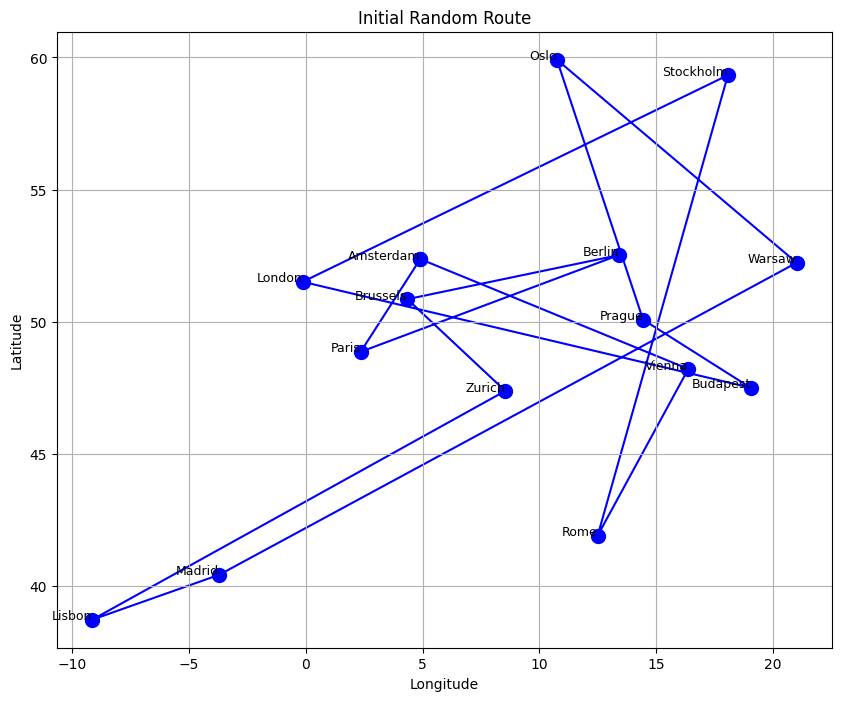

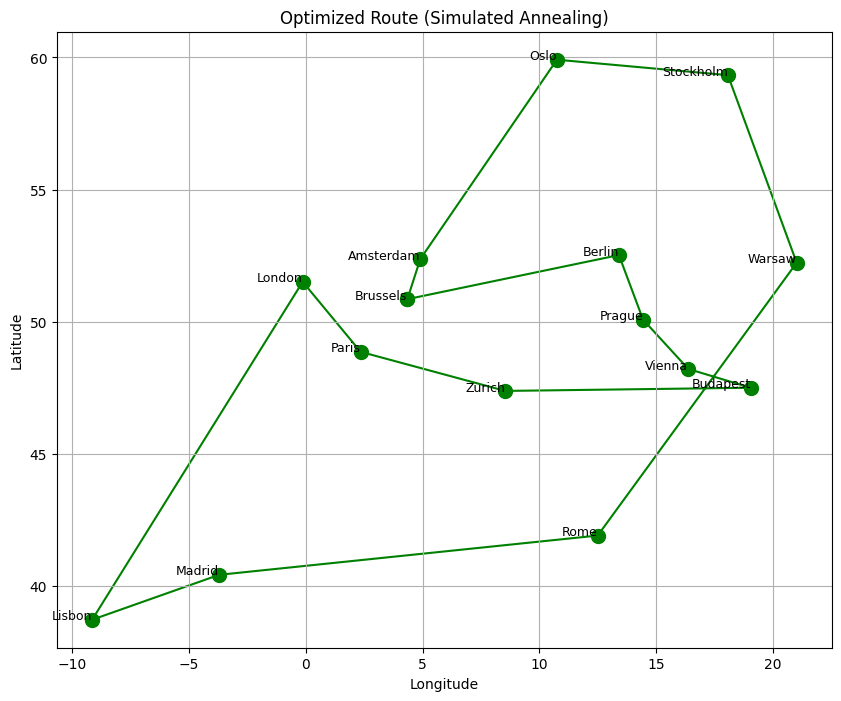

In [13]:
def plot_route(route, cities, title, color):
    """Plot the TSP route on a scatter plot."""
    coordinates = np.array([cities[city_names[i]] for i in route])
    coordinates = np.vstack((coordinates, coordinates[0]))  # Close the loop
    
    plt.figure(figsize=(10, 8))
    plt.scatter(coordinates[:, 1], coordinates[:, 0], color=color, s=100, zorder=2)
    for i, city in enumerate(route):
        plt.text(coordinates[i, 1], coordinates[i, 0], city_names[city], fontsize=9, ha='right')
    plt.plot(coordinates[:, 1], coordinates[:, 0], color=color, linestyle='-', zorder=1)
    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid()
    plt.show()

plot_route(initial_route, cities, "Initial Random Route", 'blue')
plot_route(best_route, cities, "Optimized Route (Simulated Annealing)", 'green')